In [2]:
import pennylane as qml
from pennylane import numpy as np
from pennylane import qchem

symbols = ["H", "H", "H"]
coordinates = np.array([[0.0102, 0.0442, 0.0], [0.9867, 1.6303, 0.0], [1.8720, -0.0085, 0.0]])

hamiltonian, qubits = qchem.molecular_hamiltonian(symbols, coordinates, charge = -1)

hf = qchem.hf_state(electrons = 2, orbitals = 6)

num_wires = qubits
dev = qml.device("default.qubit", wires = num_wires)

@qml.qnode(dev)
def exp_energy(state):
    qml.BasisState(np.array(state), wires=range(num_wires))
    return qml.expval(hamiltonian)

def ansatz(params):
    qml.BasisState(hf, wires=range(num_wires))
    qml.DoubleExcitation(params[0], wires=[0,1,2,3])
    qml.DoubleExcitation(params[1], wires=[0,1,4,5])

@qml.qnode(dev)
def cost_function(params):
    ansatz(params)
    return qml.expval(hamiltonian)

opt= qml.GradientDescentOptimizer(stepsize=0.4)
theta = np.array([0.0,0.0], requires_grad = True)

energy = [cost_function(theta)]
angle = [theta]
max_iterations = 20

for n in range(max_iterations):
    theta, prev_energy = opt.step_and_cost(cost_function, theta)
    
    energy.append(cost_function(theta))
    angle.append(theta)

    if n%2 == 0:
        print(f"Step = {n}, Energy = {energy[-1]: .8f} Ha")


Step = 0, Energy = -1.23936057 Ha
Step = 2, Energy = -1.24982656 Ha
Step = 4, Energy = -1.25244009 Ha
Step = 6, Energy = -1.25309086 Ha
Step = 8, Energy = -1.25325368 Ha
Step = 10, Energy = -1.25329471 Ha
Step = 12, Energy = -1.25330513 Ha
Step = 14, Energy = -1.25330780 Ha
Step = 16, Energy = -1.25330850 Ha
Step = 18, Energy = -1.25330868 Ha


Bond length = 0.5 Å, Final energy = -0.41078847 Ha
Bond length = 0.6666666666666666 Å, Final energy = -0.79761089 Ha
Bond length = 0.8333333333333333 Å, Final energy = -0.98555079 Ha
Bond length = 1.0 Å, Final energy = -1.07896977 Ha
Bond length = 1.1666666666666665 Å, Final energy = -1.12200002 Ha
Bond length = 1.3333333333333333 Å, Final energy = -1.13652726 Ha
Bond length = 1.5 Å, Final energy = -1.13469066 Ha
Bond length = 1.6666666666666665 Å, Final energy = -1.12356599 Ha
Bond length = 1.8333333333333333 Å, Final energy = -1.10732647 Ha
Bond length = 2.0 Å, Final energy = -1.08849626 Ha


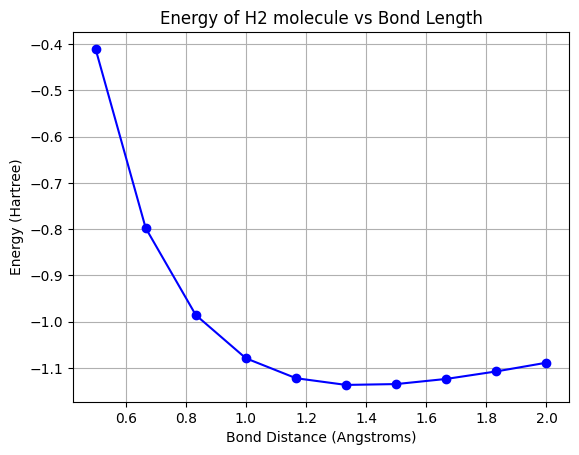

In [3]:
import pennylane as qml
import numpy as np
from pennylane import qchem
import matplotlib.pyplot as plt

# Set up the H2 molecule: two hydrogen atoms
symbols = ["H", "H"]
coordinates = np.array([[0.0, 0.0, 0.0], [0.0, 0.0, 0.74]])  # Initial bond length (in Angstroms)

# Generate the Hamiltonian for the H2 molecule
hamiltonian, qubits = qchem.molecular_hamiltonian(symbols, coordinates, charge=0)

# Hartree-Fock state preparation
hf = qchem.hf_state(electrons=2, orbitals=4)

num_wires = qubits
dev = qml.device("default.qubit", wires=num_wires)

@qml.qnode(dev)
def exp_energy(state):
    qml.BasisState(np.array(state), wires=range(num_wires))
    return qml.expval(hamiltonian)

def ansatz(params):
    qml.BasisState(hf, wires=range(num_wires))
    qml.DoubleExcitation(params[0], wires=[0, 1, 2, 3])

@qml.qnode(dev)
def cost_function(params):
    ansatz(params)
    return qml.expval(hamiltonian)

# Set up optimizer
opt = qml.GradientDescentOptimizer(stepsize=0.4)
theta = qml.numpy.array([0.0], requires_grad=True)  # Changed this line

# Variables for plotting
distances = []  # To track bond length
energies = []  # To track energies

# Maximum number of optimization steps
max_iterations = 20

# Loop over different bond lengths and calculate the energy
for dist in np.linspace(0.5, 2.0, 10):  # Vary the distance between atoms
    coordinates = np.array([[0.0, 0.0, 0.0], [0.0, 0.0, dist]])  # Update the coordinates with the new distance
    hamiltonian, qubits = qchem.molecular_hamiltonian(symbols, coordinates, charge=0)
    hf = qchem.hf_state(electrons=2, orbitals=4)

    energy = [cost_function(theta)]  # Store initial energy

    for n in range(max_iterations):
        theta, prev_energy = opt.step_and_cost(cost_function, theta)
        energy.append(cost_function(theta))

    distances.append(dist)
    energies.append(energy[-1])  # Store final energy for each bond length

    print(f"Bond length = {dist} Å, Final energy = {energy[-1]: .8f} Ha")

# Plotting energy vs. bond distance
plt.plot(distances, energies, marker='o', linestyle='-', color='b')
plt.xlabel('Bond Distance (Angstroms)')
plt.ylabel('Energy (Hartree)')
plt.title('Energy of H2 molecule vs Bond Length')
plt.grid(True)
plt.show()

